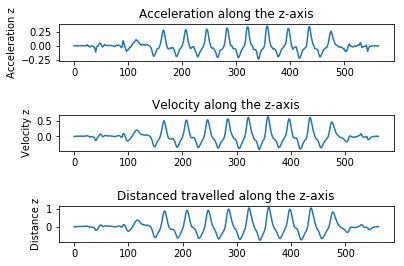

In [2]:
import pandas as pd
from scipy.signal import butter, lfilter, freqz, savgol_filter, filtfilt, detrend, find_peaks
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
%matplotlib inline

lowRow = pd.read_csv('../PhoneAccelerometer/chestpress_10rpt_30kg', sep=';')
lowRow.head()

# we assume that the motion is mainly on the z axis  
z = lowRow['z']


# filting acceleration signal and integrating twice to get distance travelled by the equipment's weight
order = 1
fs = 20 # sample rate, Hz 
fc = 1.5  
b, a = butter(order, fc / (0.5 * fs), btype='low', analog=False)
d, c = butter(order, fc / (0.5 * fs), btype='high', analog=False)

z_filtered =  y = lfilter(b, a, z)
#z_filtered = savgol_filter(z, 15, 2)
plt.subplot(3, 1, 1)
plt.subplots_adjust(hspace = 1.5)
plt.title('Acceleration along the z-axis')
plt.ylabel('Acceleration z')
plt.plot(z_filtered)

vel = cumtrapz(z_filtered)
#vel_detrended = detrend(vel)
vel_filtered = lfilter(d, c, vel)
plt.subplot(3, 1, 2)
plt.title('Velocity along the z-axis')
plt.ylabel('Velocity z')
plt.plot(vel_filtered)
dist = cumtrapz(vel_filtered)
dist_filtered = lfilter(d, c, dist)
dist_filtered = dist_filtered - dist_filtered.mean()

#dist_detrended = detrend(dist, type='linear')
plt.subplot(3, 1, 3)
plt.plot(dist_filtered)
plt.title('Distanced travelled along the z-axis')
plt.ylabel('Distance z')

plt.show()
# Savitzky–Golay filter

# plt.plot(z_filtered2) 


# Couting Reps 
##### 1. The naive way:
Simply use the find_peaks function to count peaks. Assuming the interval between reps is at least 0.3 sec. 

fs = 20Hz

dt = 1/20 = 0.05

assuming at least 0.3 sec between reps = 6 samples
and the height is 30 cm (in one direction)


In [45]:
peak_min_width = 0.3 * fs;
peak_min_height = 0.3 # 30 cm
peaks, peaks_props = find_peaks(dist_filtered, height=peak_min_height, width = peak_min_width)
# find mean of peaks and accept only those within ?x-std?
peak_prominance = peaks_props['prominences']
peak_vals = peaks_props['peak_heights']
peak_mean = np.mean(peak_vals)
peak_std = np.std(peak_vals)

print("Peak Heights:", peak_vals)
print("Peak Heights - Mean:" , peak_mean)
print("Peak Heights - Std:" , peak_std)
print("Peak prominence:", peak_prominance)
print("# Reps: ", peak_vals.size)

#nonzero_count = (np.where(np.abs(peak_mean - peak_vals) < 2*peak_std))


Peak Heights: [0.37678238 0.89872963 0.92929476 0.94161718 1.00226935 1.06918698
 1.11478462 1.002792   1.0706287  0.83929002]
Peak Heights - Mean: 0.924537562924326
Peak Heights - Std: 0.19972713331907768
Peak prominence: [0.6410563  1.51759    1.58014813 1.60593672 1.70767067 1.79917757
 1.87131797 1.67817054 1.754314   1.17280042]
# Reps:  10


<function tuple.count>

## TODO
* Range of movement
* Trip-Symmetry
* Speed 
* Weight-Too-High detection
* Measure of Quality


12


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


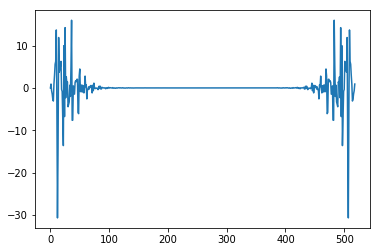

In [37]:
import numpy as np
import matplotlib.pyplot as plt


DIST = np.fft.fft(dist_filtered)
f_max = np.argmax(abs(DIST)*2)
print(f_max)
plt.plot(DIST)
